# Cleaning and Exploratory Data Analysis of Netflix's Data
Based on the dataset shared here at https://www.kaggle.com/datasets/mahmoudtaya/netflix-titles

We have tried to perform the following tasks:

    - Finding the missing values. 
    - Cleaning the data.
    - Checking for duplicate values.
    - Formatting different columns.
    - What are the types of content on Netflix?
    - What are the top 10 content contributing countries on Netflix?
    - What are the highest contributing countries for TV Shows on Netflix?
    - What are the highest contributing countries for Movies on Netflix?
    - What is the content contribution over different years?
    - What is the TV Show contribution over years?
    - What is the Movies contribution over years?
    - Which age group prefers to watch Netflix the most? 
    - Which age group prefers to watch TV shows on Netflix the most?
    - Which age group prefers to watch Movies on Netflix the most?

In [1]:
# Importing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing data
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### Finding the missing values

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
# Data types

df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

### Handling missing values

In [8]:
df.director.isnull().sum()

2634

In [9]:
df["director"] = df.director.fillna("Unknown")

In [10]:
df.director.isnull().sum()

0

In [11]:
# Some of the data of duration column is present in rating column, so need to fix this.
df[df.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [12]:
df.duration.loc[[5541,5794,5813]] = df.rating.loc[[5541,5794,5813]]

In [13]:
df.loc[[5541,5794,5813], "rating"] = df.rating.mode()[0] 

In [14]:
df[df.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [15]:
df["cast"] = df.cast.fillna("Unknown")

In [16]:
df["country"] = df.country.fillna(df.country.mode()[0])

In [17]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         0
listed_in        0
description      0
dtype: int64

In [18]:
df.rating.value_counts()

TV-MA       3210
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [19]:
df.rating.mode()

0    TV-MA
dtype: object

In [20]:
df["rating"] = df.rating.fillna(df.rating.mode()[0])

In [21]:
df.rating.isnull().sum()

0

In [22]:
df.date_added.isnull().sum()

10

In [23]:
df.date_added.value_counts()

January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 6, 2017       1
January 25, 2020       1
December 17, 2015      1
October 2, 2017        1
May 23, 2021           1
Name: date_added, Length: 1767, dtype: int64

In [24]:
df.date_added.mode()[0]

'January 1, 2020'

In [25]:
df["date_added"] = df.date_added.fillna(df.date_added.mode()[0])

In [26]:
df.date_added.isnull().sum()

0

In [27]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

##### All missing values are handled 

##### Checking for duplicates 

In [28]:
df.duplicated().sum()

0

### Formatting the data type and Splitting the year and month from date column

In [29]:
df.date_added.dtypes

dtype('O')

In [30]:
df["date_added"] = pd.to_datetime(df.date_added)

In [31]:
def fetch_date(x):
    return pd.Series([x.day, x.month, x.year])

In [32]:
df[["day", "month", "year"]] = df.date_added.apply(fetch_date)

In [33]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021


### Formatting the rating column and making it easy to understand

In [34]:
df.rating.value_counts()

TV-MA       3214
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [35]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [36]:
df.rating.nunique()

14

In [37]:
rating_age_group = {
        "PG-13" : "Teens", 
        "TV-MA" : "Adults",
        "PG"    : "Older kids",
        "TV-14" : "Teens",
        "TV-PG" : "Older kids",
        "TV-Y"  : "Kids",
        "TV-Y7" : "Older kids",
        "R"     : "Adults",
        "TV-G"  : "Kids",
        "G"     : "Kids",
        "NC-17" : "Adults",
        "NR"    : "Adults",
        "TV-Y7-FV" : "Older kids",
        "UR"    : "Adults"
    }

In [38]:
df["rating_age_group"] = df.rating.replace(to_replace = rating_age_group)

In [39]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day,month,year,rating_age_group
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,Teens
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021,Adults


### Analyzing the data and making visuals

In [40]:
# Analyzing the type column

df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

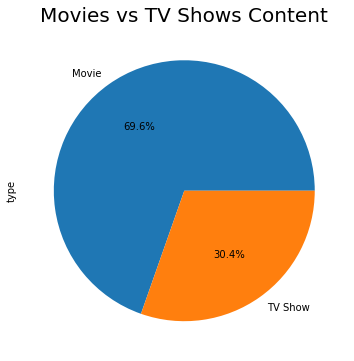

In [41]:
plt.figure(figsize = (6,6))
df.type.value_counts().plot.pie(autopct = "%1.1f%%")
plt.title("Movies vs TV Shows Content", fontsize = 20)
plt.show()

Here we can see that 69.6% content belongs to movie and 30.4% belongs to TV Show.

### Analyzing the country columns

In [42]:
top_10_countries = df.country.value_counts(ascending = False).head(10)

In [43]:
top_10_countries

United States     3649
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

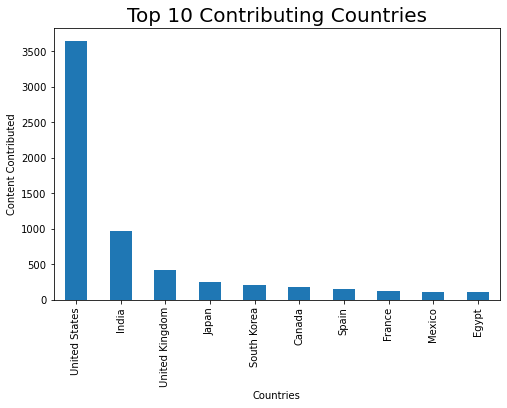

In [44]:
plt.figure(figsize = (8,5))
top_10_countries.plot.bar()
plt.title("Top 10 Contributing Countries", fontsize = 20)
plt.xlabel("Countries")
plt.ylabel("Content Contributed")
plt.show()

As we can see in this figure that United states contribute the most content followed by India and United Kingdom.

### Highest contributing countries of TV shows

In [45]:
TV_shows_data = df[df.type == "TV Show"]

In [46]:
TV_shows_data.country.value_counts()

United States                                                                         1151
United Kingdom                                                                         213
Japan                                                                                  169
South Korea                                                                            158
India                                                                                   79
                                                                                      ... 
Italy, Canada, France                                                                    1
Italy, United States                                                                     1
United Kingdom, Finland, Germany, United States, Australia, Japan, France, Ireland       1
Japan, Canada, United States                                                             1
Germany, Czech Republic                                                                  1

In [47]:
# Top 5 TV Shows 
Top5_TV_Shows = TV_shows_data.country.value_counts().head()

In [48]:
Top5_TV_Shows

United States     1151
United Kingdom     213
Japan              169
South Korea        158
India               79
Name: country, dtype: int64

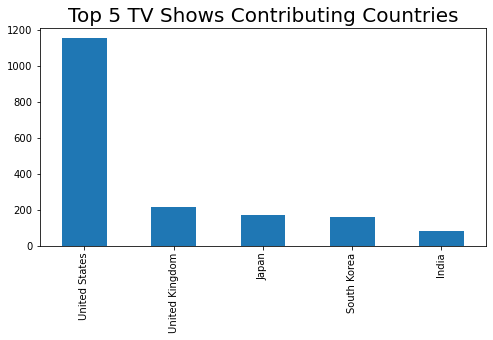

In [49]:
plt.figure(figsize = (8, 4))
Top5_TV_Shows.plot.bar()
plt.title("Top 5 TV Shows Contributing Countries", fontsize = 20)
plt.show()

We can see that United States is the highest contributing country for TV shows followed by United Kingdom on Netflix.

### Highest contributing countries of Movies on Netflix

In [50]:
Movie_data = df[df.type == "Movie"]

In [51]:
# Top 5 movies
Top5_Movies = Movie_data.country.value_counts().head()

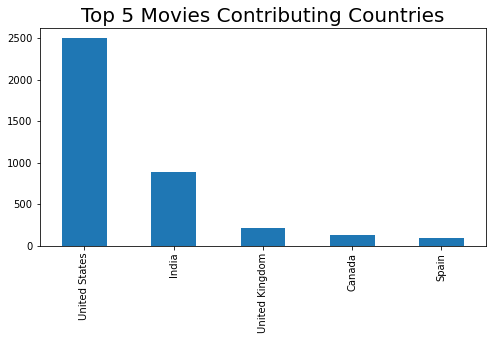

In [52]:
plt.figure(figsize = (8, 4))
Top5_Movies.plot.bar()
plt.title("Top 5 Movies Contributing Countries", fontsize = 20)
plt.show()

We can see that United States is the highest contributing country for Movies followed by India on Netflix.

### Content distribution over years 

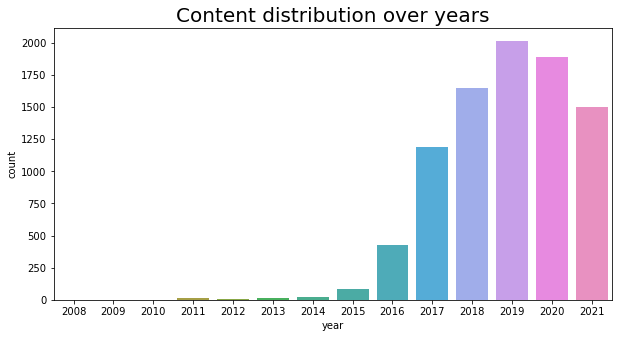

In [53]:
plt.figure(figsize = (10, 5))
sns.countplot(df.year)
plt.title("Content distribution over years", fontsize = 20)
plt.show()

Here we can see that content distibution is increasing over years and have a peak at 2019 and then decreasing.
This decrease could be due to covid. 

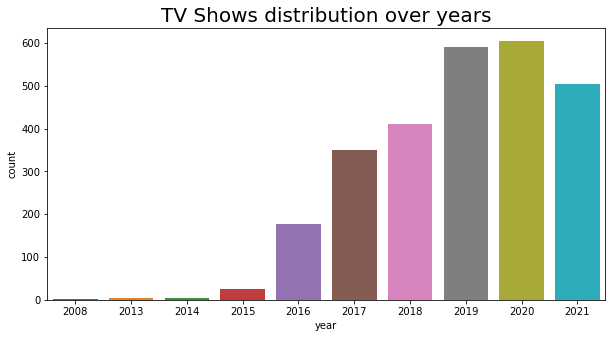

In [54]:
# TV Shows distrbution over years 
plt.figure(figsize = (10, 5))
sns.countplot(TV_shows_data.year)
plt.title("TV Shows distribution over years", fontsize = 20)
plt.show()

TV shows is in upward trend with a little drop in year 2021.

In [ ]:
# Movie distribution over years 
plt.figure(figsize = (10, 5))
sns.countplot(Movie_data.year)
plt.title("Movies distribution over years", fontsize = 20)
plt.show()

The movie content is seen to be increasing in the past years, but a change in trend is observed in 2020-2021. This may be due to the Covid 19 pandemic.

### Percentage of content watched by different age groups

In [ ]:
plt.figure(figsize = (6,6))
df.rating_age_group.value_counts().plot.pie(autopct = "%1.1f%%")
plt.title("Content watched by different age groups", fontsize = 20)
plt.show()

From the chart we can conclude that a major audience of Netflix is from the Adults age group followed by Teens.

### Percentage of TV Shows watched by different age groups

In [ ]:
plt.figure(figsize = (6,6))
TV_shows_data.rating_age_group.value_counts().plot.pie(autopct = "%1.1f%%")
plt.title("TV Shows watched by different age groups", fontsize = 20)
plt.show()

It is evident from the pie chart, that the TV Shows in Netflix has a major audience of Adults and Teens.

### Percentage of Movies watched by different age groups

In [ ]:
plt.figure(figsize = (6,6))
Movie_data.rating_age_group.value_counts().plot.pie(autopct = "%1.1f%%")
plt.title("Movies watched by different age groups", fontsize = 20)
plt.show()

On analyzing the data, it is visualized from the chart that Adults and Teens are the major Movie watchers on Netflix. 

# Summary
    - There are 2 types of content on Netflix which are TV shows and Movies.
    - United states contribute the most content on Netflix followed by India and United Kingdom.
    - United States is the highest contributing country for TV shows followed by United Kingdom on Netflix.
    - United States is the highest contributing country for Movies followed by India on Netflix.
    - TV shows is in upward trend with a little drop in year 2021, which could be due to Covid. 
    - The movie content is seen to be increasing in the past years, but a change in trend is observed in 2020-2021. This may be due to the Covid 19 pandemic.
    - The TV Shows in Netflix has a major audience of Adults and Teens.
    - Adults and Teens are the major Movie watchers on Netflix